In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [206]:
data = pd.read_csv("./pison_data_interview.csv", header=None, names=["timestamp","chan0_raw","chan1_raw","chan0_hp","chan1_hp","quat_x","quat_y","quat_z","quat_w","gyro_x","gyro_y","gyro_z","acc_x","acc_y","acc_z","label","rep"])


In [207]:
IMU_data = data[["timestamp","gyro_x","gyro_y","gyro_z","acc_x","acc_y","acc_z","label","rep"]]

In [208]:
trial_idx = IMU_data[(np.abs(IMU_data.label.diff())>0)].index.tolist()

In [209]:
standing1_df = pd.concat([IMU_data[(IMU_data.label == 0)]])
standing2_df = pd.concat([IMU_data[(IMU_data.label == 1)]])
walking_df = pd.concat([IMU_data[(IMU_data.label == 2)]])
walking_fast_df = pd.concat([IMU_data[(IMU_data.label == 3)]])
running_df = pd.concat([IMU_data[(IMU_data.label == 4)]])


In [210]:
standing1_df = standing1_df.reset_index(drop=True)
standing2_df = standing2_df.reset_index(drop=True)
walking_df = walking_df.reset_index(drop=True)
walking_fast_df = walking_fast_df.reset_index(drop=True)
running_df = running_df.reset_index(drop=True)


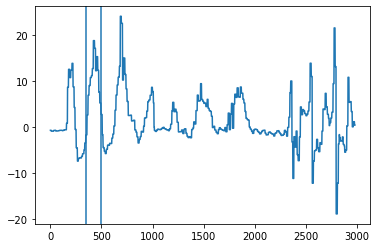

In [211]:
plt.plot(standing1_df.acc_x)
plt.axvline(350)
plt.axvline(500);

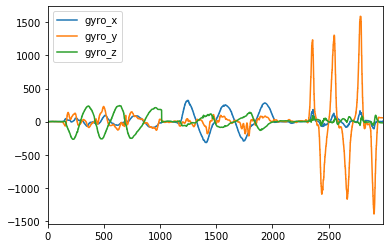

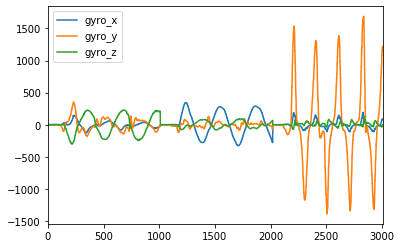

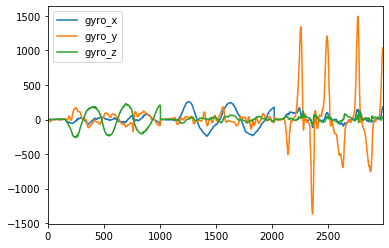

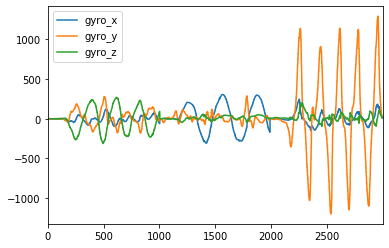

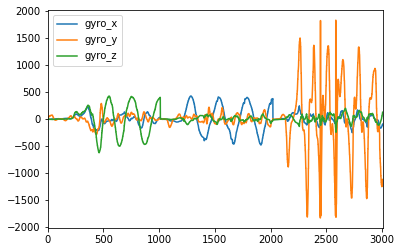

In [212]:
standing1_df.plot(None,["gyro_x","gyro_y","gyro_z"]);
standing2_df.plot(None,["gyro_x","gyro_y","gyro_z"]);
walking_df.plot(None,["gyro_x","gyro_y","gyro_z"]);
walking_fast_df.plot(None,["gyro_x","gyro_y","gyro_z"]);
running_df.plot(None,["gyro_x","gyro_y","gyro_z"]);

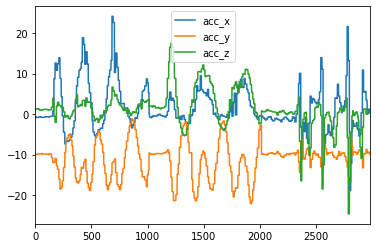

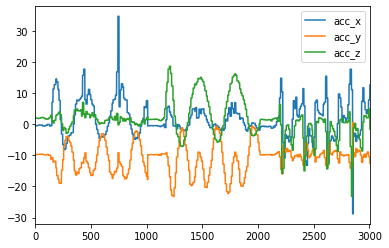

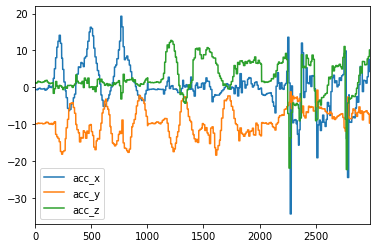

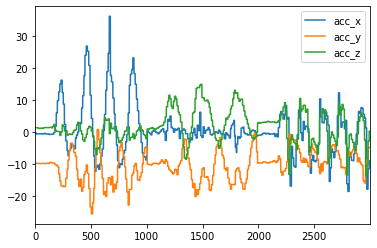

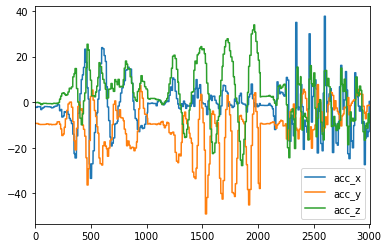

In [213]:
standing1_df.plot(None,["acc_x","acc_y","acc_z"]);
standing2_df.plot(None,["acc_x","acc_y","acc_z"]);
walking_df.plot(None,["acc_x","acc_y","acc_z"]);
walking_fast_df.plot(None,["acc_x","acc_y","acc_z"]);
running_df.plot(None,["acc_x","acc_y","acc_z"]);

In [214]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def windowed_view(arr, window, overlap):
    arr = np.asarray(arr)
    window_step = window - overlap
    new_shape = arr.shape[:-1] + ((arr.shape[-1] - overlap) // window_step,
                                  window)
    new_strides = (arr.strides[:-1] + (window_step * arr.strides[-1],) +
                   arr.strides[-1:])
    return as_strided(arr, shape=new_shape, strides=new_strides)

In [215]:
trial_idx = IMU_data[(np.abs(IMU_data.label.diff())>0)].index.tolist()

In [216]:
def create_trial_vals(row):
    if row["label"] == 0 and row["rep"] == 1:
        return 1
    elif row["label"] == 0 and row["rep"] == 2:
        return 2
    elif row["label"] == 0 and row["rep"] == 3:
        return 3
    elif row["label"] == 1 and row["rep"] == 1:
        return 4
    elif row["label"] == 1 and row["rep"] == 2:
        return 5
    elif row["label"] == 1 and row["rep"] == 3:
        return 6
    elif row["label"] == 2 and row["rep"] == 1:
        return 7
    elif row["label"] == 2 and row["rep"] == 2:
        return 8
    elif row["label"] == 2 and row["rep"] == 3:
        return 9
    elif row["label"] == 3 and row["rep"] == 1:
        return 10
    elif row["label"] == 3 and row["rep"] == 2:
        return 11
    elif row["label"] == 3 and row["rep"] == 3:
        return 12
    elif row["label"] == 4 and row["rep"] == 1:
        return 13
    elif row["label"] == 4 and row["rep"] == 2:
        return 14
    elif row["label"] == 4 and row["rep"] == 3:
        return 15
    

In [217]:
IMU_data["trial"] = IMU_data.apply(lambda row: create_trial_vals(row), axis=1)

/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [218]:
IMU_data

,timestamp,gyro_x,gyro_y,gyro_z,acc_x,acc_y,acc_z,label,rep,trial
0,1514824.503,-1.342870,1.063105,0.503576,-0.660156,-10.003906,1.21875,0,1,1
1,1514827.496,-1.510729,1.175011,0.000000,-0.660156,-10.003906,1.21875,0,1,1
2,1514830.493,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1,1
3,1514833.500,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1,1
4,1514836.498,-1.063105,0.839294,-0.727388,-0.660156,-10.003906,1.21875,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14976,1618167.393,-114.255844,-1219.997200,82.026960,0.363281,-1.464844,-9.00000,4,3,15
14977,1618170.388,-114.255844,-1219.997200,82.026960,0.363281,-1.464844,-9.00000,4,3,15
14978,1618173.377,-104.464080,-1181.054100,103.904560,0.363281,-1.464844,-9.00000,4,3,15
14979,1618176.442,-94.336610,-1117.715300,125.782140,0.363281,-1.464844,-9.00000,4,3,15


In [219]:
acc_x_all_windows = []
acc_y_all_windows = []
acc_z_all_windows = []
gyro_x_all_windows = []
gyro_y_all_windows = []
gyro_z_all_windows = []

for trial_num in sorted(IMU_data["trial"].unique()):
    mask = (IMU_data["trial"] == trial_num)
    acc_x_windows = windowed_view(IMU_data[mask].acc_x,150,50)
    acc_y_windows = windowed_view(IMU_data[mask].acc_y,150,50)
    acc_z_windows = windowed_view(IMU_data[mask].acc_z,150,50)
    gyro_x_windows = windowed_view(IMU_data[mask].gyro_x,150,50)
    gyro_y_windows = windowed_view(IMU_data[mask].gyro_y,150,50)
    gyro_z_windows = windowed_view(IMU_data[mask].gyro_z,150,50)
    
    acc_x_all_windows.append(acc_x_windows.tolist())
    acc_y_all_windows.append(acc_y_windows.tolist())
    acc_z_all_windows.append(acc_z_windows.tolist())
    gyro_x_all_windows.append(gyro_x_windows.tolist())
    gyro_y_all_windows.append(gyro_y_windows.tolist())
    gyro_z_all_windows.append(gyro_z_windows.tolist())
    

acc_x_all_windows = [item for sublist in acc_x_all_windows for item in sublist]
acc_y_all_windows = [item for sublist in acc_y_all_windows for item in sublist]
acc_z_all_windows = [item for sublist in acc_z_all_windows for item in sublist]
gyro_x_all_windows = [item for sublist in gyro_x_all_windows for item in sublist]
gyro_y_all_windows = [item for sublist in gyro_y_all_windows for item in sublist]
gyro_z_all_windows = [item for sublist in gyro_z_all_windows for item in sublist]


In [220]:
def zero_crossings(x):
    ZC=0;
    for pos in range(len(x)-1):
        if ((x[pos] > 0 and x[pos+1] < 0) or (x[pos] < 0 and x[pos+1] > 0)) and (np.abs(x[pos]-x[pos+1]) >= 0):
            ZC=ZC+1;
    return ZC

In [221]:
acc_x_integrals = scipy.integrate.simps(acc_x_all_windows)
acc_y_integrals = scipy.integrate.simps(acc_y_all_windows)
acc_z_integrals = scipy.integrate.simps(acc_z_all_windows)
gyro_x_integrals = scipy.integrate.simps(gyro_x_all_windows)
gyro_y_integrals = scipy.integrate.simps(gyro_y_all_windows)
gyro_z_integrals = scipy.integrate.simps(gyro_z_all_windows)

acc_x_variance = [statistics.variance(x) for x in acc_x_all_windows]
acc_y_variance = [statistics.variance(x) for x in acc_y_all_windows]
acc_z_variance = [statistics.variance(x) for x in acc_z_all_windows]
gyro_x_variance = [statistics.variance(x) for x in gyro_x_all_windows]
gyro_y_variance = [statistics.variance(x) for x in gyro_y_all_windows]
gyro_z_variance = [statistics.variance(x) for x in gyro_z_all_windows]

acc_x_mean = [np.abs(np.mean(x)) for x in acc_x_all_windows]
acc_y_mean = [np.abs(np.mean(x)) for x in acc_y_all_windows]
acc_z_mean = [np.abs(np.mean(x)) for x in acc_z_all_windows]
gyro_x_mean = [np.abs(np.mean(x)) for x in gyro_x_all_windows]
gyro_y_mean = [np.abs(np.mean(x)) for x in gyro_y_all_windows]
gyro_z_mean = [np.abs(np.mean(x)) for x in gyro_z_all_windows]

acc_x_zc = [zero_crossings(x) for x in acc_x_all_windows]
acc_y_zc = [zero_crossings(x) for x in acc_y_all_windows]
acc_z_zc = [zero_crossings(x) for x in acc_z_all_windows]
gyro_x_zc = [zero_crossings(x) for x in gyro_x_all_windows]
gyro_y_zc = [zero_crossings(x) for x in gyro_y_all_windows]
gyro_z_zc = [zero_crossings(x) for x in gyro_z_all_windows]


In [222]:
IMU_features = pd.DataFrame({"acc_x_integrals": acc_x_integrals,
                             "acc_x_integrals": acc_y_integrals,
                             "acc_x_integrals": acc_z_integrals,
                             "gyro_x_integrals": gyro_x_integrals,
                             "gyro_y_integrals": gyro_y_integrals,
                             "gyro_z_integrals": gyro_z_integrals,
                             "acc_x_variance": acc_x_variance,
                             "acc_y_variance": acc_y_variance,
                             "acc_z_variance": acc_z_variance,
                             "gyro_x_variance": gyro_x_variance,
                             "gyro_y_variance": gyro_y_variance,
                             "gyro_z_variance": gyro_z_variance,
                             "acc_x_mean": acc_x_mean,
                             "acc_y_mean": acc_y_mean,
                             "acc_z_mean": acc_z_mean,
                             "gyro_x_mean": gyro_x_mean,
                             "gyro_y_mean": gyro_y_mean,
                             "gyro_z_mean": gyro_z_mean,
                             "acc_x_zc": acc_x_zc,
                             "acc_y_zc": acc_y_zc,
                             "acc_z_zc": acc_z_zc,
                             "gyro_x_zc": gyro_x_zc,
                             "gyro_y_zc": gyro_y_zc,
                             "gyro_z_zc": gyro_z_zc
                             })


In [233]:
features = ["acc_x_integrals","acc_x_integrals","acc_x_integrals","gyro_x_integrals","gyro_y_integrals","gyro_z_integrals",
            "acc_x_variance","acc_y_variance","acc_z_variance","gyro_x_variance","gyro_y_variance","gyro_z_variance",
            "acc_x_mean","acc_y_mean","acc_z_mean","gyro_x_mean","gyro_y_mean","gyro_z_mean","acc_x_zc","acc_y_zc",
            "acc_z_zc","gyro_x_zc","gyro_y_zc","gyro_z_zc"]
            

In [235]:
poly = PolynomialFeatures(include_bias=False)

X_poly = poly.fit_transform(IMU_features)

IMU_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [236]:
# Instantiate our StandardScaler.
ss = StandardScaler()

# Standardize X_train.
IMU_poly_scaled = ss.fit_transform(IMU_poly)

In [237]:
# Instantiate PCA.
pca = PCA(random_state = 42)

# Fit PCA on the training data.
pca.fit(IMU_poly_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

# Transform PCA on the training data.
IMU_pca = pca.transform(IMU_poly_scaled)

In [239]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance: {np.round(var_exp,3)}')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance: {np.round(cum_var_exp,3)}')

Explained variance: [0.147 0.13  0.11  0.069 0.051 0.046 0.043 0.035 0.032 0.031 0.026 0.024
 0.022 0.018 0.016 0.014 0.012 0.011 0.01  0.01  0.009 0.008 0.007 0.007
 0.006 0.006 0.006 0.005 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.003
 0.003 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.   ]
Cumulative explained variance: [0.147 0.277 0.387 0.455 0.506 0.552 0.595 0.63  0.662 0.693 0.719 0.743
 0.764 0.782 0.798 0.812 0.824 0.835 0.846 0.856 0.865 0.873 0.88  0.88

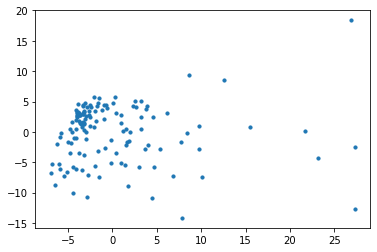

In [250]:
plt.scatter(IMU_pca[:,1],IMU_pca[:,3], s=10);

In [252]:
IMU_pca = pd.DataFrame(IMU_pca)

In [253]:
IMU_pca.to_csv(f'./outputs/IMU_pca_01.csv', index=False)